In [1]:
import pandas as pd

df = pd.read_csv('./data/eng_crawling.csv')
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,Wonderful,0
7146,"January 12, 2020",luis arias,5,Wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,Awesome 🌟 🌟 🌟 🌟,0
7148,"October 13, 2017",A Google user,5,Good Good Good,0


In [7]:
### 앱 개선 사항 뽑기

In [6]:
import re
eng = re.compile("[^a-zA-Z]")

#전처리 이모티콘, 특수문자 등 제거, 소문자 치환
#통상적으로 숫자도 지운다
df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: re.sub(eng, " ",x))
df['Review'] = df['Review'].apply(lambda x: x.strip())
df


,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,wonderful,0
7146,"January 12, 2020",luis arias,5,wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,awesome,0
7148,"October 13, 2017",A Google user,5,good good good,0


In [8]:
#성의 없는 30단어 미만 리뷰 제거

df['length'] = df['Review'].apply(lambda x: len(x))
df

,Date,Name,Score,Review,like,length
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,378
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,498
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,479
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,354
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,465
...,...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,wonderful,0,9
7146,"January 12, 2020",luis arias,5,wonderful,0,9
7147,"September 24, 2017",Tobiloba Bakare,5,awesome,0,7
7148,"October 13, 2017",A Google user,5,good good good,0,14


In [11]:
df = df.loc[df['length']>=30]
df.reset_index(drop = True)
del df['length']
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1
...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0


In [17]:
%pip install nltk

ERROR: Could not find a version that satisfies the requirement punkt_tab (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /Users/donna/.local/pipx/venvs/notebook/bin/python -m pip install --upgrade pip
ERROR: No matching distribution found for punkt_tab
Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/donna/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
#TOKENIZING
from nltk import word_tokenize
df['token'] = df['Review'].apply(lambda x : word_tokenize(x))
df

,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[completely, frustrating, experience, paid, ex..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[some, good, features, but, this, app, isn, t,..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[this, app, works, perfectly, it, allowed, us,..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, but, not, great, for, an, app, by, lg, ..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, is, useful, but, limited, and, requires,..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[it, is, very, good, and, useful, app, in, my,..."
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[can, t, even, open, the, app, crashes]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[it, is, well, helpfull, for, my, reference, t..."
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[it, s, not, installing, showing, a, error]"


In [22]:
#1. remove stop words 쓸모 없는 형태소 제거하기
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stop_words


[nltk_data] Downloading package stopwords to /Users/donna/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
token = []
for i in df['token']:
    tok = []
    for w in i:
        if w in stop_words:
            pass
        else:
            tok.append(w)
    token.append(tok)
df['token'] = token
df

,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[completely, frustrating, experience, paid, ex..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, features, app, smart, would, think, con..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, works, perfectly, allowed, us, download,..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interface, friend..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, useful, limited, requires, updates, wifi..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, useful, app, lifr]"
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crashes]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpfull, reference, application, good,..."
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[installing, showing, error]"


In [26]:
#어근 추출
#목적에 따라서 적절한 방법 선택 필요
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
lemmatizer =WordNetLemmatizer()
stemmer = PorterStemmer()
print([lemmatizer.lemmatize(word) for word in df['token'][0]]) #품사 유지
print(" ")
print([stemmer.stem(word) for word in df['token'][0]]) #어근, 어원

#춤을 추다
# lemmatize => 춤, 추다
# stem => 추

[nltk_data] Downloading package wordnet to /Users/donna/nltk_data...


['completely', 'frustrating', 'experience', 'paid', 'extra', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'time', 'try', 'use', 'get', 'connect', 'device', 'take', 'less', 'minute', 'get', 'disconnected', 'tried', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'work', 'completely', 'frustrated']
 
['complet', 'frustrat', 'experi', 'paid', 'extra', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'less', 'minut', 'get', 'disconnect', 'tri', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'complet', 'frustrat']


In [29]:
df['token'] = df['token'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, use, app, lifr]"
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, help, refer, applic, good, applic]"
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]"


In [32]:
%pip install wordcloud


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /Users/donna/.local/pipx/venvs/notebook/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
#text mining
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
#word clound -> local represectation is enough no need to genrated vector
words =[]
for i in df['token']:
    for w in i:
        words.append(w)
words

['complet',
 'frustrat',
 'experi',
 'paid',
 'extra',
 'money',
 'get',
 'air',
 'condit',
 'connect',
 'work',
 'time',
 'tri',
 'use',
 'get',
 'connect',
 'devic',
 'take',
 'less',
 'minut',
 'get',
 'disconnect',
 'tri',
 'reinstal',
 'app',
 'clear',
 'cach',
 'reset',
 'router',
 'replac',
 'router',
 'noth',
 'work',
 'complet',
 'frustrat',
 'good',
 'featur',
 'app',
 'smart',
 'would',
 'think',
 'connect',
 'devic',
 'would',
 'give',
 'ui',
 'ux',
 'specif',
 'devic',
 'connect',
 'new',
 'stove',
 'oven',
 'imag',
 'use',
 'repr',
 'stove',
 'match',
 'stovetop',
 'burner',
 'layout',
 'direct',
 'oven',
 'remot',
 'start',
 'written',
 'gener',
 'tri',
 'fit',
 'product',
 'look',
 'see',
 'would',
 'put',
 'effort',
 'person',
 'experi',
 'devic',
 'purcha',
 'rate',
 'higher',
 'app',
 'work',
 'perfectli',
 'allow',
 'us',
 'download',
 'mani',
 'cycl',
 'washer',
 'dryer',
 'realli',
 'cool',
 'featur',
 'problem',
 'one',
 'thing',
 'kind',
 'bother',
 'power',
 'm

In [38]:
Counter(words)

Counter({'app': 3961,
         'work': 1595,
         'lg': 1450,
         'use': 1290,
         'connect': 1088,
         'washer': 923,
         'phone': 849,
         'time': 753,
         'need': 682,
         'wash': 636,
         'dryer': 628,
         'machin': 590,
         'get': 589,
         'updat': 557,
         'cycl': 554,
         'tri': 507,
         'even': 487,
         'permiss': 476,
         'set': 465,
         'devic': 450,
         'wifi': 440,
         'smart': 416,
         'like': 413,
         'would': 404,
         'download': 404,
         'new': 401,
         'start': 400,
         'make': 359,
         'applianc': 359,
         'control': 359,
         'want': 352,
         'product': 335,
         'one': 333,
         'say': 330,
         'turn': 327,
         'remot': 324,
         'good': 323,
         'root': 320,
         'great': 319,
         'run': 319,
         'open': 316,
         'access': 306,
         'function': 305,
         'featur': 28

In [39]:

text = nltk.Text(words, name = 'app')
len(text)

79689

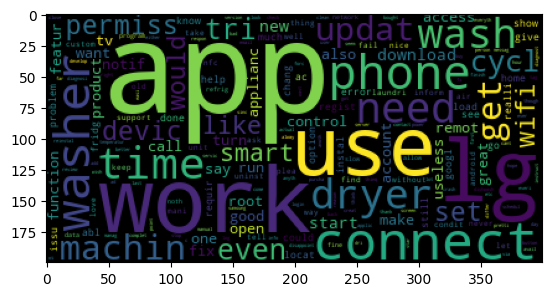

In [44]:
wc = WordCloud()
count = Counter(text)
wc  = wc.generate_from_frequencies(count)
wc = wc.to_array()
plt.imshow(wc)

In [49]:
count = dict(count)
bindo = pd.DataFrame({"word": list(count.keys()),
        "count": list(count.values())})
bindo = bindo.sort_values(by=['count'],ascending=False).reset_index(drop=True)
bindo

,word,count
0,app,3961
1,work,1595
2,lg,1450
3,use,1290
4,connect,1088
...,...,...
4842,diari,1
4843,independ,1
4844,doual,1
4845,comedyp,1


In [51]:
#TF-IDF
text_imsi = nltk.Text(df['token'][0], name = 'app_imsi')
text_imsi = dict(Counter(text_imsi))
text_imsi #TF

{'complet': 2,
 'frustrat': 2,
 'experi': 1,
 'paid': 1,
 'extra': 1,
 'money': 1,
 'get': 3,
 'air': 1,
 'condit': 1,
 'connect': 2,
 'work': 2,
 'time': 1,
 'tri': 2,
 'use': 1,
 'devic': 1,
 'take': 1,
 'less': 1,
 'minut': 1,
 'disconnect': 1,
 'reinstal': 1,
 'app': 1,
 'clear': 1,
 'cach': 1,
 'reset': 1,
 'router': 2,
 'replac': 1,
 'noth': 1}

In [58]:
import numpy as np

for i in text_imsi.keys():
    tf = text_imsi[i]
    
    num = 0
    for w in df['token']:
        if i in w:
            num += 1
    idf = np.log(len(df.index)/(1+num))
    print(i, '의 tf-idf 점수:', tf*idf)

    

complet 의 tf-idf 점수: 7.255337446138079
frustrat 의 tf-idf 점수: 8.838511952884476
experi 의 tf-idf 점수: 4.6295513852785986
paid 의 tf-idf 점수: 4.983191425522176
extra 의 tf-idf 점수: 4.651057590499562
money 의 tf-idf 점수: 4.436647719154107
get 의 tf-idf 점수: 6.694968337440684
air 의 tf-idf 점수: 3.523871929387396
condit 의 tf-idf 점수: 3.6045016637875054
connect 의 tf-idf 점수: 3.5653294786443452
work 의 tf-idf 점수: 2.6548602619122352
time 의 tf-idf 점수: 2.0339791676030785
tri 의 tf-idf 점수: 4.794960153224422
use 의 tf-idf 점수: 1.5375422812891875
devic 의 tf-idf 점수: 2.5661959813503867
take 의 tf-idf 점수: 3.4492610655962213
less 의 tf-idf 점수: 4.742029368705289
minut 의 tf-idf 점수: 4.419255976442238
disconnect 의 tf-idf 점수: 4.436647719154107
reinstal 의 tf-idf 점수: 3.734766858625407
app 의 tf-idf 점수: 0.639386003668493
clear 의 tf-idf 점수: 4.79081953287472
cach 의 tf-idf 점수: 6.081803714190286
reset 의 tf-idf 점수: 4.58787868887803
router 의 tf-idf 점수: 9.17575737775606
replac 의 tf-idf 점수: 5.045711782503511
noth 의 tf-idf 점수: 3.5597180611

In [66]:
# %pip install --upgrade pip setuptools wheel
%pip install gensim

  Using cached gensim-4.4.0.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-2.1.1-cp314-cp314-macosx_11_0_arm64.whl.metadata (7.4 kB)
Using cached smart_open-7.5.0-py3-none-any.whl (63 kB)
Using cached wrapt-2.1.1-cp314-cp314-macosx_11_0_arm64.whl (61 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [797 lines of output]
      /private/var/folders/w3/37c0bgr97_1ck58v8vk0l01w0000gn/T/pip-build-env-9vvm_a__/overlay/lib/python3.14/site-packages/setuptools/_distutils/dist.py:287: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      /private/var/folders/w3/37c0bgr97_1ck58v8vk0l01w0000gn/T/pip-build-env-9vvm_a__/overlay/lib/python3.14/site-packages/setuptools/_distutils/dist.py:2

In [62]:
#distributed representation
import gensim
from gensim.models.word2vec import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [ ]:
model = Word2Vec(df['token'], sg = True, window = 3, min_count = 3, vector_size=100)

In [ ]:
model.wv['condition']

In [ ]:
model.wv.most_similar('lg')